In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('telcom_data.csv')

In [3]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
# Handle missing values
df.fillna(df.mean(),inplace=True)

TypeError: can only concatenate str (not "int") to str

In [7]:
# Identifying the top 10 handsets used by customers
top_10_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:")
print(top_10_handsets)

# Identifying the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("\nTop 3 Handset Manufacturers:")
print(top_3_manufacturers)

# Identifying the top 5 handsets per top 3 handset manufacturers
top_3_manufacturers_handsets = df[df['Handset Manufacturer'].isin(top_3_manufacturers.index)]
top_5_handsets_per_manufacturer = top_3_manufacturers_handsets.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)
print("\nTop 5 Handsets per Manufacturer:")
print(top_5_handsets_per_manufacturer)

# Interpretation and recommendation to marketing teams
print("\nInterpretation and Recommendation:")
print("The top 10 handsets used by customers give an idea of the popular devices among the users.")
print("The top 3 handset manufacturers show the dominant players in the market.")
print("The top 5 handsets per manufacturer provide insights into the popular devices from the leading manufacturers.")
print("Based on these findings, the marketing teams can focus their efforts on promoting the popular handsets and collaborating with the top manufacturers to create targeted marketing campaigns.")

Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64

Top 5 Handsets per Manufacturer:
Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A 

### Task 1.1: Aggregate user behavior information:

#### Group the data by user and calculate the following metrics: number of xDR sessions, session duration, total download and upload data, and total data volume for each application.
#### Create a new DataFrame with the aggregated information.

In [8]:
user_behavior = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'count',
    'Start ms': 'min',
    'End ms': 'max',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)' : 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Display the resulting user behavior dataframe
print(user_behavior)

        MSISDN/Number  Dur. (ms)  Start ms  End ms  Total DL (Bytes)  \
0        3.360100e+10          1     138.0   278.0      8.426375e+08   
1        3.360100e+10          1     422.0   385.0      1.207552e+08   
2        3.360100e+10          1      80.0   454.0      5.566597e+08   
3        3.360101e+10          1     158.0   182.0      4.019932e+08   
4        3.360101e+10          2     552.0   875.0      1.363130e+09   
...               ...        ...       ...     ...               ...   
106851   3.379000e+10          1     829.0   517.0      6.879252e+08   
106852   3.379000e+10          1     846.0   505.0      4.445751e+08   
106853   3.197020e+12          1     345.0   670.0      1.948281e+08   
106854   3.370000e+14          1     811.0    12.0      5.396350e+08   
106855   8.823970e+14          1     259.0   459.0      7.869760e+07   

        Total UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0             36053108.0                2206504.0        

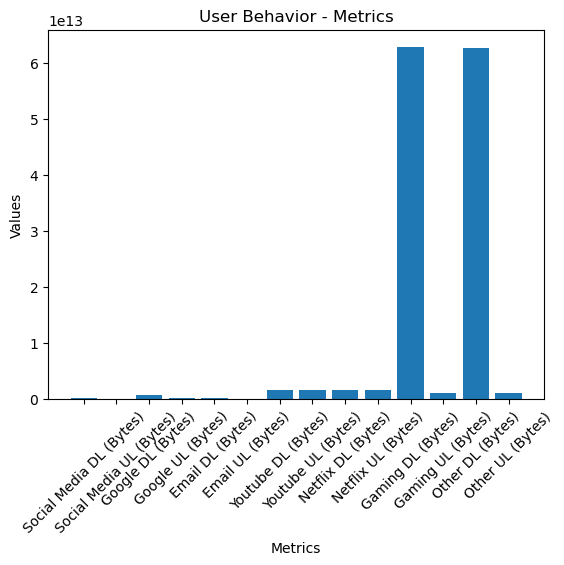

In [9]:
# Select the columns for box plot
Bar_metrics= [
"Social Media DL (Bytes)", "Social Media UL (Bytes)", "Google DL (Bytes)", "Google UL (Bytes)",
"Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)",    
"Netflix UL (Bytes)","Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)" , "Other UL (Bytes)" ]

values = user_behavior[Bar_metrics].sum()

# Create the bar chart
plt.bar(Bar_metrics, values)

# Set the plot title
plt.title('User Behavior - Metrics')

# Set the x-axis label
plt.xlabel('Metrics')

# Set the y-axis label
plt.ylabel('Values')

# Rotate the x-axis labels for better readability 
plt.xticks(rotation=45)

# Display the bar chart
plt.show()


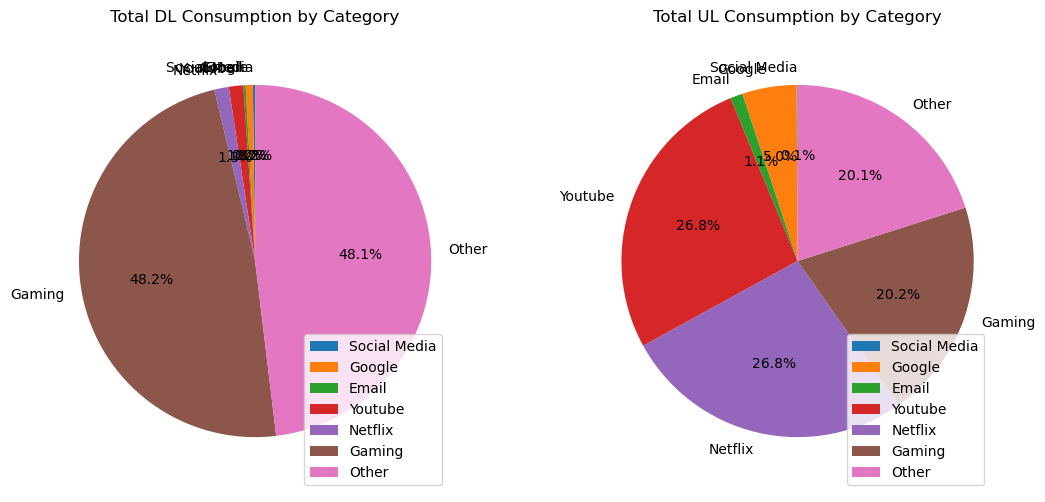

In [10]:
# Calculate the total DL data for each category
dl_data = [
    user_behavior["Social Media DL (Bytes)"].sum(),
    user_behavior["Google DL (Bytes)"].sum(),
    user_behavior["Email DL (Bytes)"].sum(),
    user_behavior["Youtube DL (Bytes)"].sum(),
    user_behavior["Netflix DL (Bytes)"].sum(),
    user_behavior["Gaming DL (Bytes)"].sum(),
    user_behavior["Other DL (Bytes)"].sum()
]

# Calculate the total UL data for each category
ul_data = [
    user_behavior["Social Media UL (Bytes)"].sum(),
    user_behavior["Google UL (Bytes)"].sum(),
    user_behavior["Email UL (Bytes)"].sum(),
    user_behavior["Youtube UL (Bytes)"].sum(),
    user_behavior["Netflix UL (Bytes)"].sum(),
    user_behavior["Gaming UL (Bytes)"].sum(),
    user_behavior["Other UL (Bytes)"].sum()
]

# Create labels for each category
labels = ["Social Media", "Google", "Email", "Youtube", "Netflix", "Gaming", "Other"]

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the DL pie chart
ax1.pie(dl_data, labels=labels, autopct="%1.1f%%", startangle=90)
ax1.set_title("Total DL Consumption by Category")

# Plot the UL pie chart
ax2.pie(ul_data, labels=labels, autopct="%1.1f%%", startangle=90)
ax2.set_title("Total UL Consumption by Category")

# Set aspect ratio to be equal so that pie is drawn as a circle
ax1.axis("equal")
ax2.axis("equal")

# Add legends to the subplots
ax1.legend(loc="lower right")
ax2.legend(loc="lower right")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the figure
plt.show()

## Task 1.2: Exploratory data analysis

In [11]:
# Analyze basic metrics
metrics = ['Dur. (ms)','Start ms', 'End ms','Total DL (Bytes)', 'Total UL (Bytes)']
basic_stats = user_behavior[metrics].describe()
print(basic_stats)

           Dur. (ms)       Start ms         End ms  Total DL (Bytes)  \
count  106856.000000  106856.000000  106856.000000      1.068560e+05   
mean        1.393792     443.958449     542.177388      6.336527e+08   
std         0.806022     287.051071     287.664826      4.645551e+08   
min         1.000000       0.000000       0.000000      8.827082e+06   
25%         1.000000     192.000000     301.000000      3.148271e+08   
50%         1.000000     416.000000     565.000000      5.703677e+08   
75%         2.000000     681.000000     795.000000      8.073645e+08   
max        18.000000     999.000000     999.000000      8.156743e+09   

       Total UL (Bytes)  
count      1.068560e+05  
mean       5.730942e+07  
std        3.565765e+07  
min        2.866892e+06  
25%        3.639547e+07  
50%        4.679387e+07  
75%        6.573199e+07  
max        7.295774e+08  


In [12]:
# Non-Graphical Univariate Analysis
dispersion_params = user_behavior[metrics].std()
print(dispersion_params)

Dur. (ms)           8.060220e-01
Start ms            2.870511e+02
End ms              2.876648e+02
Total DL (Bytes)    4.645551e+08
Total UL (Bytes)    3.565765e+07
dtype: float64


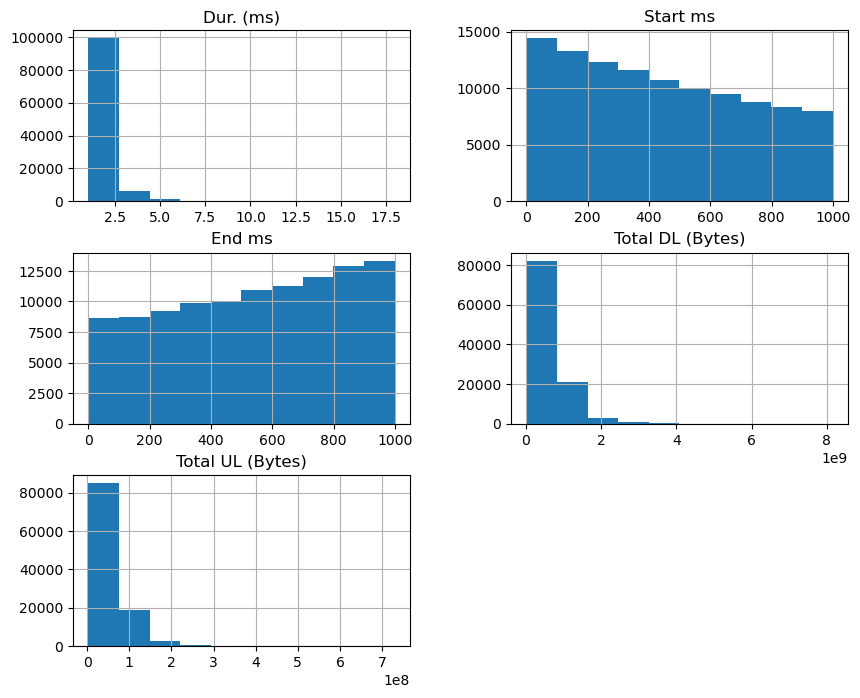

In [13]:
# Graphical Univariate Analysis
user_behavior.hist(column=metrics, bins=10, figsize=(10, 8))
plt.ylabel("Frequency")
plt.show()

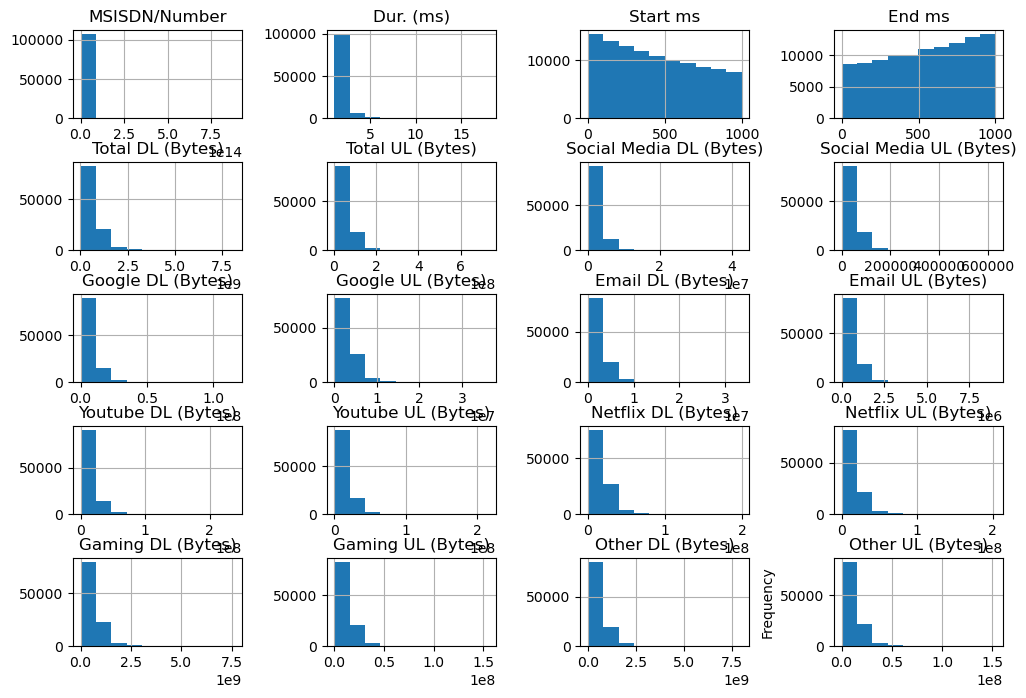

In [14]:
user_behavior.hist(bins=10, figsize=(12, 8))
plt.ylabel("Frequency")
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Increase the values to increase the distance

# Show the figure
plt.show()

                     Total DL (Bytes)  Total UL (Bytes)
Data Usage Category                                    
Very Low                 0.000000e+00      0.000000e+00
Low                      0.000000e+00      0.000000e+00
Medium                   0.000000e+00      0.000000e+00
High                     0.000000e+00      0.000000e+00
Very High                6.770959e+13      6.123856e+12


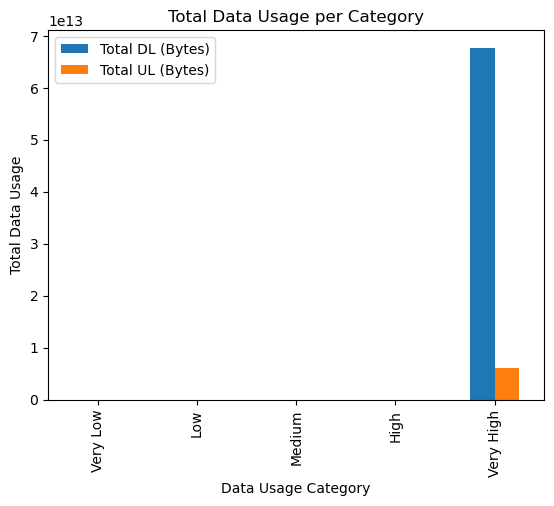

In [15]:
import pandas as pd

# Assuming user_behavior is your DataFrame and it's already defined
bins = [0, 500, 1000, 1500, 2000, float('inf')]  # Example bins
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column for data usage categories
user_behavior['Data Usage Category'] = pd.cut(
    user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)'],
    bins=bins,
    labels=labels
)

# Compute the total data usage per category
data_usage_per_category = user_behavior.groupby('Data Usage Category')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

# Print the results
print(data_usage_per_category)
# Plot the data usage per category
data_usage_per_category.plot(kind='bar')
plt.xlabel('Data Usage Category')
plt.ylabel('Total Data Usage')
plt.title('Total Data Usage per Category')
plt.show()

In [16]:
corr_matrix = user_behavior[["Social Media DL (Bytes)", "Social Media UL (Bytes)", "Google DL (Bytes)", "Google UL (Bytes)",
"Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)",    
"Netflix UL (Bytes)","Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)" , "Other UL (Bytes)"]].corr()
print(corr_matrix)

                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                 0.583055   
Social Media UL (Bytes)                 0.583055                 1.000000   
Google DL (Bytes)                       0.585202                 0.586869   
Google UL (Bytes)                       0.582765                 0.585862   
Email DL (Bytes)                        0.585432                 0.584371   
Email UL (Bytes)                        0.582011                 0.582182   
Youtube DL (Bytes)                      0.582656                 0.584491   
Youtube UL (Bytes)                      0.582831                 0.583756   
Netflix DL (Bytes)                      0.583691                 0.584745   
Netflix UL (Bytes)                      0.581994                 0.578755   
Gaming DL (Bytes)                       0.580919                 0.582474   
Gaming UL (Bytes)                       0.583649                 0.582749   

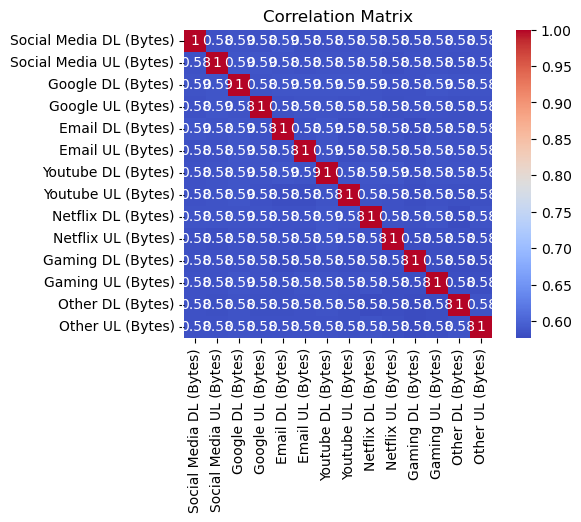

In [17]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [18]:
# Calculate the total duration for all sessions for each user
user_behavior['Total Duration'] = user_behavior['Dur. (ms)'].sum(level=0)

# Create deciles based on the total duration
user_behavior['Total Duration Decile'] = pd.qcut(user_behavior['Total Duration'], q=10, duplicates='drop')

# Group the data by decile class and calculate the sum of total data
data_usage_per_decile = user_behavior.groupby('Total Duration Decile')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

# Print the data usage per decile class
print(data_usage_per_decile)

TypeError: sum() got an unexpected keyword argument 'level'

In [19]:

# Calculate the total duration for all sessions for each user
user_behavior['Total Duration'] = user_behavior['Dur. (ms)'].sum().level=0()

# Create deciles based on the total duration
user_behavior['Total Duration Decile'] = pd.qcut(user_behavior['Total Duration'], q=10, duplicates='drop')

# Group the data by decile class and calculate the sum of total data
data_usage_per_decile = user_behavior.groupby('Total Duration Decile')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()

# Print the data usage per decile class
print(data_usage_per_decile)

<>:2: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:2: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
C:\Users\Nisha Pal\AppData\Local\Temp\ipykernel_12044\1137919166.py:2: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  user_behavior['Total Duration'] = user_behavior['Dur. (ms)'].sum().level=0()


TypeError: 'int' object is not callable

In [24]:
# Dimensionality Reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
nishapal_components = pca.fit_transform(user_behavior[["Social Media DL (Bytes)", "Social Media UL (Bytes)", "Google DL (Bytes)", "Google UL (Bytes)",
"Email DL (Bytes)", "Email UL (Bytes)", "Youtube DL (Bytes)", "Youtube UL (Bytes)", "Netflix DL (Bytes)",    
"Netflix UL (Bytes)","Gaming DL (Bytes)", "Gaming UL (Bytes)", "Other DL (Bytes)" , "Other UL (Bytes)"]])
nishapal_df = pd.DataFrame(data=nishapal_components, columns=['PC1', 'PC2'])
print(nishapal_df.head())

            PC1           PC2
0  8.954447e+06  3.060108e+08
1 -5.594646e+08 -1.239993e+08
2 -1.071667e+08  2.321836e+07
3 -5.392030e+08  2.559531e+08
4  6.448334e+08  3.745330e+08


##### PC1: The values in PC1 column represent the scores of each data point along the first nishapal component. PC1 captures the direction in the data that has the highest variance. In this case, the values range from -5.594646e+08 to 6.448334e+08. Positive values indicate that the corresponding data points have a higher projection along PC1, while negative values indicate a lower projection.

##### PC2: The values in PC2 column represent the scores of each data point along the second nishapal component. PC2 is orthogonal (uncorrelated) to PC1 and captures the second highest variance in the data. The values range from -1.239993e+08 to 3.745330e+08. Similarly, positive values indicate a higher projection along PC2, while negative values indicate a lower projection.

Variance Explained by PC1: 0.78783228829962
Variance Explained by PC2: 0.21104689943185193


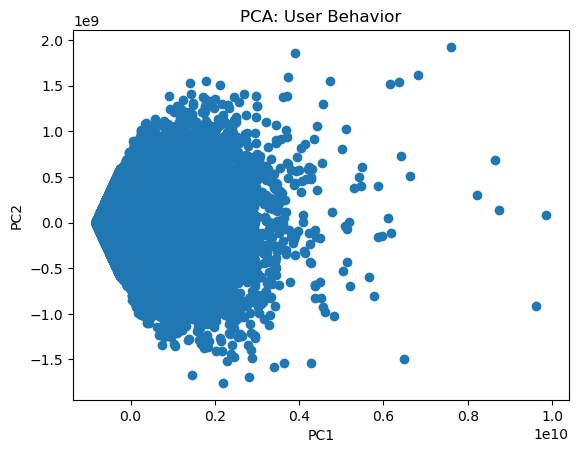

In [25]:
# Create DataFrame for nishapal components
nishapal_df = pd.DataFrame(data=nishapal_components, columns=['PC1', 'PC2'])

# Variance explained by each nishapal component
explained_variance = pca.explained_variance_ratio_
print("Variance Explained by PC1:", explained_variance[0])
print("Variance Explained by PC2:", explained_variance[1])

# Scatter plot of nishapal components
plt.scatter(nishapal_df['PC1'], nishapal_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: User Behavior')
plt.show()

In [26]:
# Interpretation of Loadings
loadings = pca.components_.T  # Transpose to match variables with loadings
variables = ["Social Media DL", "Social Media UL", "Google DL", "Google UL", "Email DL", "Email UL",
             "Youtube DL", "Youtube UL", "Netflix DL", "Netflix UL", "Gaming DL", "Gaming UL",
             "Other DL", "Other UL"]
loadings_df = pd.DataFrame(data=loadings, columns=['PC1', 'PC2'], index=variables)
print("Loadings:")
print(loadings_df)

Loadings:
                      PC1           PC2
Social Media DL  0.002218 -1.461456e-05
Social Media UL  0.000041  1.404165e-07
Google DL        0.007156 -3.130996e-05
Google UL        0.002555  5.093041e-06
Email DL         0.002221 -2.587277e-05
Email UL         0.000581 -6.571458e-06
Youtube DL       0.014511 -1.766316e-04
Youtube UL       0.013609 -9.321877e-05
Netflix DL       0.014430  1.270647e-04
Netflix UL       0.013584 -2.550708e-05
Gaming DL        0.707074  7.067661e-01
Gaming UL        0.010225  1.869335e-05
Other DL         0.706386 -7.074472e-01
Other UL         0.010221 -2.167391e-04


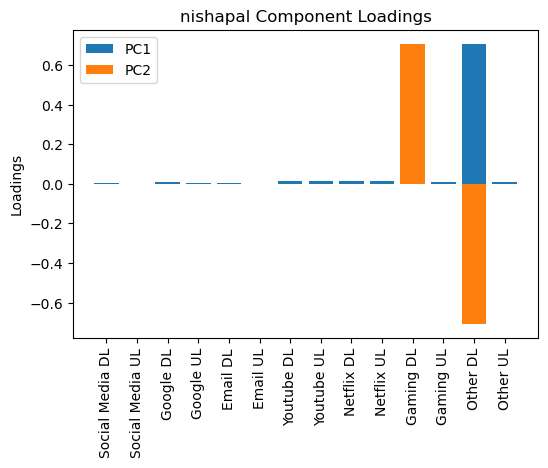

In [31]:
# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the loadings
plt.bar(range(len(loadings_df)), loadings_df['PC1'], alpha=1, label='PC1')
plt.bar(range(len(loadings_df)), loadings_df['PC2'], alpha=1, label='PC2')

# Set the x-axis ticks and labels
plt.xticks(range(len(loadings_df)), loadings_df.index, rotation=90)

# Set the y-axis label
plt.ylabel('Loadings')

# Set the title of the plot
plt.title('nishapal Component Loadings')

# Add a legend
plt.legend()

# Show the plot
plt.show()

in PC1, the variables "Social Media DL," "Social Media UL," "Google DL," "Google UL," "Email DL," "Email UL," "Youtube DL," "Youtube UL," "Netflix DL," and "Netflix UL" have relatively small loadings (close to zero), suggesting that they have less influence on the construction of PC1. On the other hand, the variables "Gaming DL" and "Other DL" have high positive loadings (0.707074 and 0.706386, respectively), indicating a strong positive relationship with PC1. This suggests that "Gaming DL" and "Other DL" contribute significantly to the variation captured by PC1.

Similarly, in PC2, all variables except "Gaming DL" and "Other DL" have small loadings close to zero, indicating less influence on the construction of PC2. "Gaming DL" and "Other DL" have loadings of 0.707661 and -0.707472, respectively, suggesting a strong negative relationship with PC2. This implies that "Gaming DL" and "Other DL" contribute significantly to the variation captured by PC2 and are negatively correlated with each other in PC2.